<a href="https://colab.research.google.com/github/NietoEmmanuel/SIMULACION-I/blob/main/Prueba_de_Frecuencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>NIETO MEJIA EMMANUEL</center>
<h1 style="text-align: center">PRUEBAS DE LAS FRECUENCIAS </h1>
Verifica si un conjunto de números pseudoaleatorios sigue una distribución uniforme entre 0 y 1.

Tendremos que la hipotesis nula es:
$$H_{0}=x_{i} \sim U(0,1)$$
Nuestra Hipotesis alterantiva será:
$$H_{a}=x_{i} \nsim U(0,1)$$
Compara la frecuencia observada $(O)$ en intervalos definidos con la frecuencia esperada$(E)$.

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*   Tendremos nuestro conjunto de numeros pseudoaleatorios, que llamaremos "datos".

In [2]:
datos = [
    0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
    0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
    0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
    0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
    0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
    0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
    0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
    0.79982, 0.45679, 0.21631, 0.87616, 0.55743,
    0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
    0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
    0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
    0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
    0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
    0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
    0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
    0.58244, 0.85853, 0.88752, 0.33729, 0.15506,
    0.23949, 0.53559, 0.33381, 0.49383, 0.75103,
    0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
    0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
    0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

*   Construimos nuestro histograma

In [3]:
def frecuencia(datos):
    contador1 = 0
    contador2 = 0
    contador3 = 0
    contador4 = 0
    contador5 = 0
    total=0

    for numero in datos:
        if numero < 0.2:
            contador1 += 1
            total+=1
        elif 0.2 <= numero < 0.4:
            contador2 += 1
            total+=1
        elif 0.4 <= numero < 0.6:
            contador3 += 1
            total+=1
        elif 0.6 <= numero < 0.8:
            contador4 += 1
            total+=1
        else:
            contador5 += 1
            total+=1

    return contador1, contador2, contador3, contador4, contador5, total

1.   Una vez visto el histograma, ponemos nuestra Frecuencia Observada $O$
2.   Se calcula la frecuencia Esperada: $E = \frac{100}{5}$
3.   Calculamos nuestro valor estadistico $\chi_0^2 = \sum \frac{(O_i - E_i)^2}{E_i}$
4.   Si el valor estadistico calculado es menor que el valor de chi-cuadrada de tablas la hipotesis nula no se rechaza.

In [6]:
resultados = frecuencia(datos)
f_observadas = resultados[:5]
total = resultados[5]

# Ingresar alpha antes de usarlo
alpha = float(input("Ingrese el valor de alpha, ejemplo 0.05: "))

# Verificar que alpha este entre 0 y 1
if 0 < alpha < 1:
    # Define los grados de libertad (filas-1)
    df = 4

    chi_cuadrada = stats.chi2.ppf(1 - alpha, df)

    #Frecuencia esperada
    f_esperada = total / 5
    estadistico_total = 0

    #Tabla
    intervalos = ["[0 - 0.2)", "[0.2 - 0.4)", "[0.4 - 0.6)", "[0.6 - 0.8)", "[0.8 - 1.0]"]
    print("-" * 60)
    print(f"{'Intervalo':<14} {'O':<6} {'E':<8} {'(O-E)':<10} {'(O-E)²/E':<12}")
    print("-" * 60)

    for i in range(5):
        O = f_observadas[i]
        E = f_esperada
        diferencia = O - E
        estadistico = (diferencia ** 2) / E
        estadistico_total += estadistico

        print(f"{intervalos[i]:<14} {O:<6} {E:<8.2f} {diferencia:<10.2f} {estadistico:<12.4f}")

    print("-" * 60)
    print(f"Total de datos:              {total}")
    print(f"Chi-cuadrada calculada:      {estadistico_total:.4f}")
    print(f"Chi-cuadrada crítica (α={alpha}): {chi_cuadrada:.4f}")

    if abs(estadistico_total) < chi_cuadrada:
        print(f"Como {estadistico_total:.4} es menor que {chi_cuadrada:.4f} . No se rechaza la hipotesis nula H0")
    else:
        print("Se rechaza la hipotesis nula H0")
else:
    # Si ponen otro valor de alpha, pide que metas un valor valido
    print("Ingrese algo entre 0 y 1")

Ingrese el valor de alpha, ejemplo 0.05: 0.05
------------------------------------------------------------
Intervalo      O      E        (O-E)      (O-E)²/E    
------------------------------------------------------------
[0 - 0.2)      21     20.00    1.00       0.0500      
[0.2 - 0.4)    22     20.00    2.00       0.2000      
[0.4 - 0.6)    19     20.00    -1.00      0.0500      
[0.6 - 0.8)    23     20.00    3.00       0.4500      
[0.8 - 1.0]    15     20.00    -5.00      1.2500      
------------------------------------------------------------
Total de datos:              100
Chi-cuadrada calculada:      2.0000
Chi-cuadrada crítica (α=0.05): 9.4877
Como 2.0 es menor que 9.4877 . No se rechaza la hipotesis nula H0


<center>GRAFICA</center>

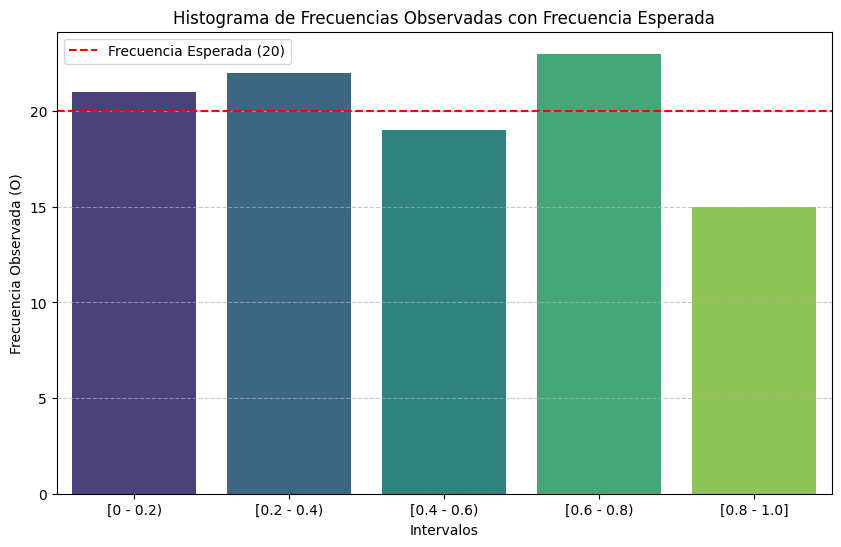

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=intervalos, y=f_observadas, hue=intervalos, palette='viridis', legend=False)
plt.axhline(y=f_esperada, color='r', linestyle='--', label='Frecuencia Esperada (20)')
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia Observada (O)')
plt.title('Histograma de Frecuencias Observadas con Frecuencia Esperada')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()